# Exercise 2B

In this exercise, you will simulate an experiment designed to measure the lifetime of an unstable particle X.  A beam of X particles is produced with a known average momentum and injected into a vacuum chamber.  Each X particle will travel some distance into the chamber before decaying at the "decay vertex", $\textbf{r}_{vtx}$.  The charged daughter particle is then detected by four tracking stations, located at various distances ($z_{stn}$) along the beam line.  Each tracking station measures the position where the track hits the station, $\textbf{r}_{hit}$.

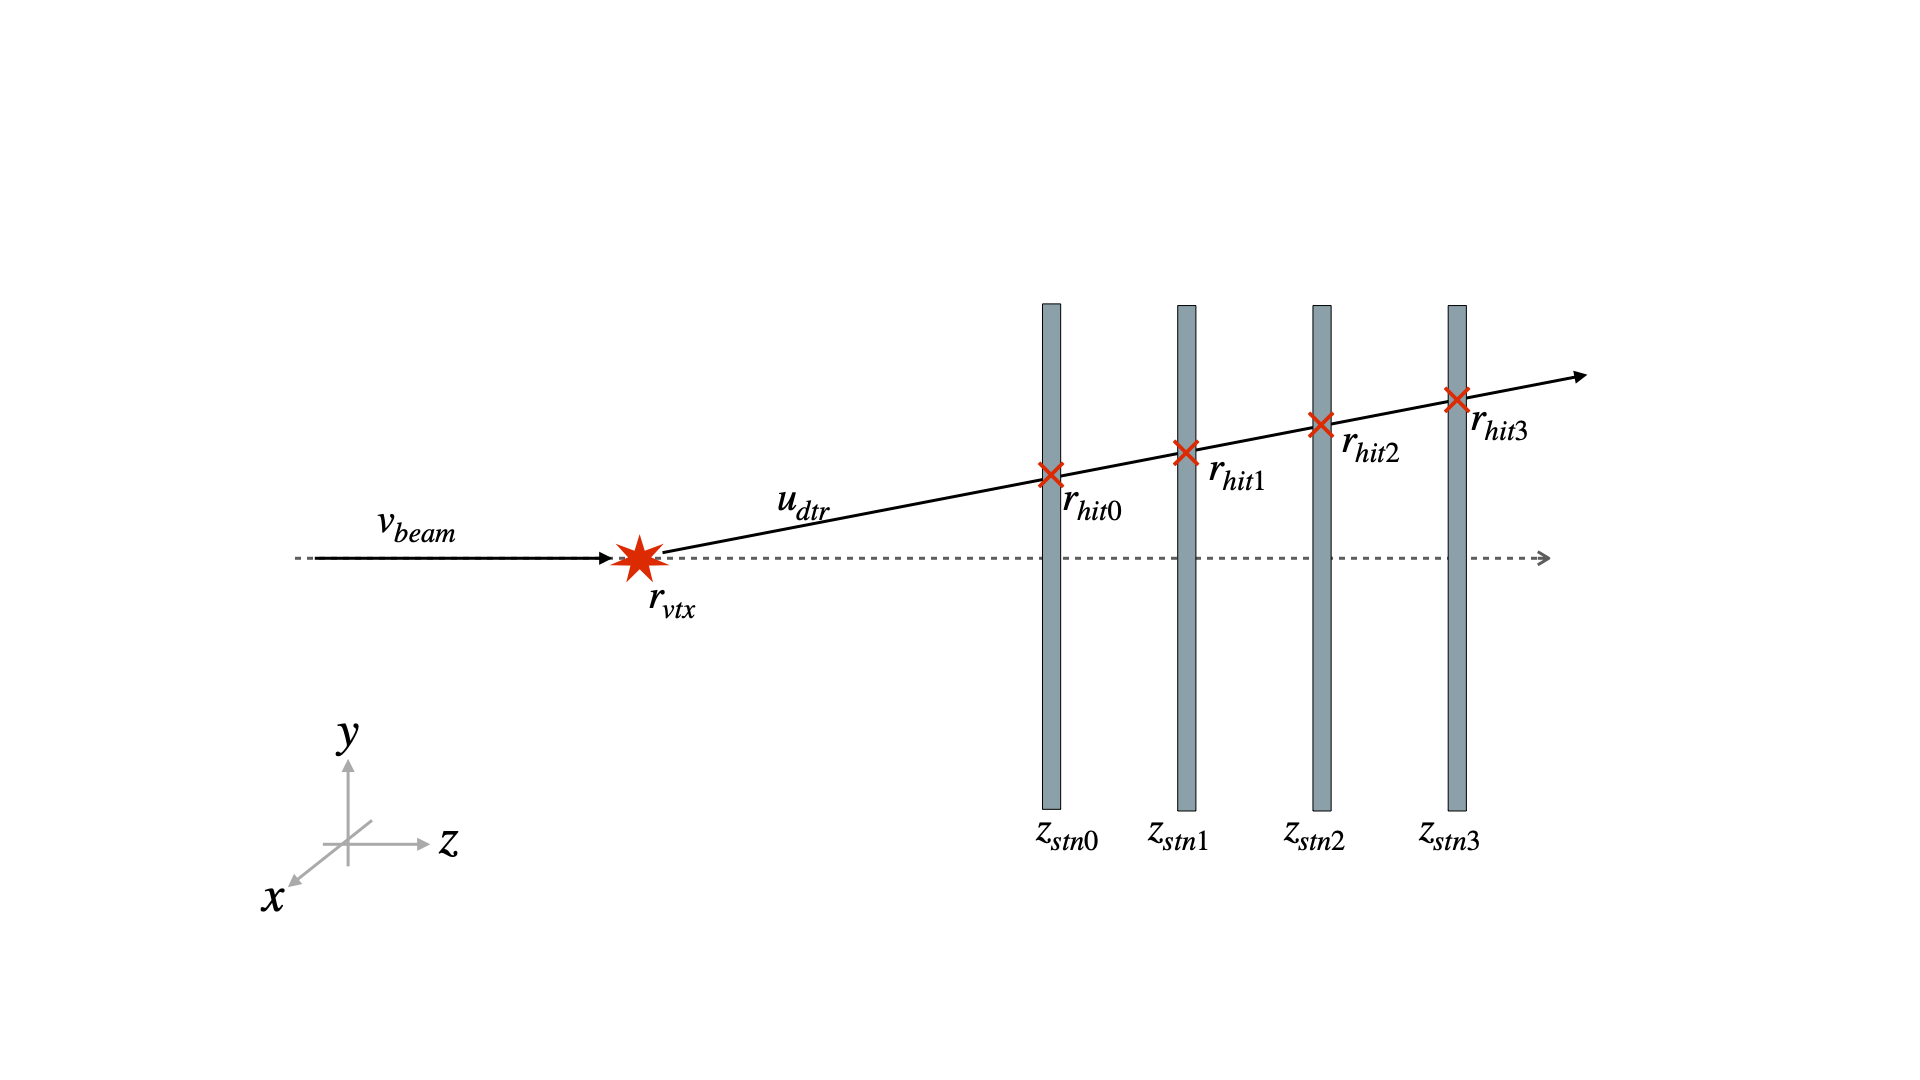

The coordinate system used is shown in the diagram, where the beam is produced at the origin and the average beam momentum is in the $z$-direction.

You will simulate the production and decay of particle X, as well as detection of its daughter particle. Each part of the exercise below deals with a different part of the experiment, for which you will generate random numbers with a specified distribution.  You will then verify the desired distribution is indeed produced - here a qualitative assessment is adequate, but a quantitative one is preferrable.

Use of simulation allows you to study the impact of different experimental choices, and your code should be capable of running with an arbitrary set of parameters. However, you can assume the initial set of parameters below : 
   * X mean lifetime, $\tau = 2.5 {\rm ms}$
   * Beam particle velocity, $\mu_v = 2000 {\rm ms}^{-1}$
   * Tracking station longitudinal positions, $z_{stn} = 30, 35, 40, 45 {\rm m}$
   * Tracking station transverse size, $\Delta x = 5 {\rm m}$, $\Delta y= 5 {\rm m}$
   * Tracking hit resolution, $\sigma_{rx, ry} = 0.01 {\rm m}$

It is strongly recommended that you use 3D vectors throughout the exercises, using numpy arrays, and numpy functions for vector algebra.

**Remember**
   * You are expected to use numpy and scipy libraries where appropriate.  
   * You should run each cell in order from the top of the notebook; there is no need to repeat code between cells
   * Use the "refresh kernel" button to reset everything and start again
   * Make sure your notebook runs fully & without errors, from a fresh kernel, before submitting it

## Part 1 - Beam Generation

First, you should simulate the production of X particles in the beam.  Assume each particle has fixed velocit

Each particle in the beam will have a velocity in the z-direction, that is drawn from a normal distribution with mean $\mu_{pz}$ and standard deviation $\sigma_{pz}$.  The particle should decay after a time that is drawn from an exponential distribution with mean lifetime $\tau$.  Given the velocity and the decay time, the decay position in the lab frame can then be calculated.  You can assume the beam is non-relativistic.

In the cell below, write functions to simulate the beam velocity, the decay time, and the decay vertex.  Verify that the correct distributions are produced.

In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm, expon

In [4]:
# Parameters
NumParticles = int(1e5)
MuPZ = 2000
SigmaPZ = 50
Tau = 1
StationPositions = np.array([30, 35, 40, 45])
Resolution = 0.01

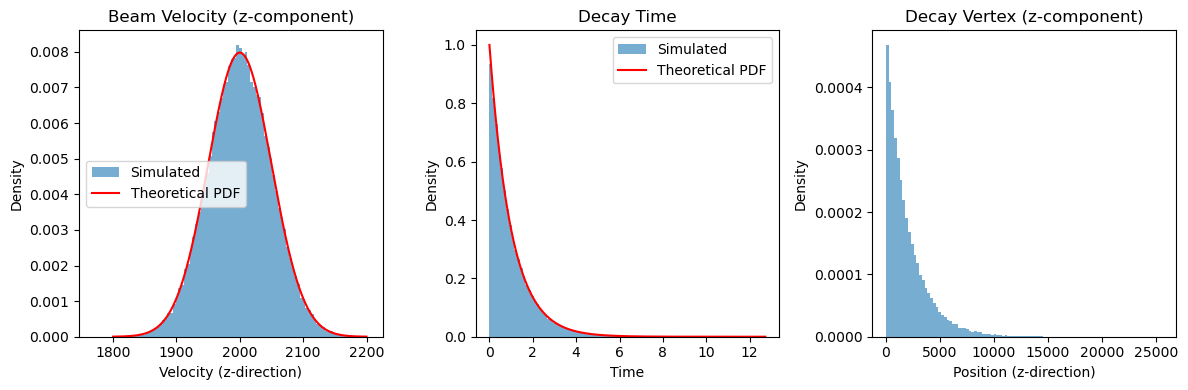

In [5]:
def BeamVelocity(NumParticles, MuPZ, SigmaPZ):
    """
    Simulates the beam velocity for each particle in the z-direction, drawn from a normal distribution.

    Parameters:
        NumParticles (int): The number of particles to simulate.
        MuPZ (float): The mean velocity in the z-direction (m/s).
        SigmaPZ (float): The standard deviation of the velocity in the z-direction (m/s).

    Returns:
        np.ndarray: An array of shape (3, NumParticles), where each column is the velocity vector 
                    of a particle in 3D space. The z-component is drawn from a normal distribution.
    """
    BeamVelocity = np.zeros((3, NumParticles))
    BeamVelocity[2, :] = np.random.normal(MuPZ, SigmaPZ, NumParticles)
    return BeamVelocity

def BeamDecayTime(NumParticles, Tau):
    """
    Simulates the decay time for each particle, drawn from an exponential distribution.

    Parameters:
        NumParticles (int): The number of particles to simulate.
        Tau (float): The mean lifetime of the particles.

    Returns:
        np.ndarray: An array of decay times, each drawn from an exponential distribution.
    """
    return np.random.exponential(scale=Tau, size=NumParticles)

def DecayVertex(BeamVelocity, BeamDecayTime):
    """
    Calculates the decay vertex (z-component) for each particle based on the beam velocity and decay time.

    Parameters:
        BeamVelocity (np.ndarray): The beam velocity of the particles.
        BeamDecayTime (np.ndarray): The decay times for each particle.

    Returns:
        np.ndarray: The decay positions in the z-direction for each particle.
    """
    # Focus on the z-component for the decay vertex calculation
    DecayVertex = BeamVelocity[2, :] * BeamDecayTime  # just the z-component
    return DecayVertex

# Call functions
BeamVelocity = BeamVelocity(NumParticles, MuPZ, SigmaPZ)
BeamDecayTime = BeamDecayTime(NumParticles, Tau)
DecayVertex = DecayVertex(BeamVelocity, BeamDecayTime)

# Plotting
plt.figure(figsize=(12, 4))

# Plot Beam Velocity (z-component)
plt.subplot(1, 3, 1)
plt.hist(BeamVelocity[2, :], bins=100, density=True, alpha=0.6, label="Simulated")
x = np.linspace(MuPZ - 4*SigmaPZ, MuPZ + 4*SigmaPZ, 1000)
plt.plot(x, norm.pdf(x, MuPZ, SigmaPZ), label="Theoretical PDF", color='red')
plt.title("Beam Velocity (z-component)")
plt.xlabel("Velocity (z-direction)")
plt.ylabel("Density")
plt.legend()

# Plot Decay Time
plt.subplot(1, 3, 2)
plt.hist(BeamDecayTime, bins=100, density=True, alpha=0.6, label="Simulated")
x = np.linspace(0, max(BeamDecayTime), 1000)
plt.plot(x, expon.pdf(x, scale=Tau), label="Theoretical PDF", color='red')
plt.title("Decay Time")
plt.xlabel("Time")
plt.ylabel("Density")
plt.legend()

# Plot Decay Vertex (z-component only)
plt.subplot(1, 3, 3)
plt.hist(DecayVertex, bins=100, density=True, alpha=0.6)
plt.title("Decay Vertex (z-component)")
plt.xlabel("Position (z-direction)")
plt.ylabel("Density")

plt.tight_layout()
plt.show()


## Part 2 - Daughter Particle

Now simulate the direction of the decay product, which should be _isotropic_ in the rest frame of the beam particle. This is the same as generating points on the surface of a unit sphere, with uniform probability over the solid angle $d\Omega$. This can be achieved in spherical coordinates, by generating the two angles, $\phi$ and $\theta$.  These should not have uniform distributions, since the area element is given by :

$${\rm d}\Omega = \sin(\theta) {\rm d}\phi {\rm d}\theta$$

To obtain uniform probability over the sphere, you should generate $\phi$ with a uniform distribution between $0$ and $2\pi$, and $\theta$ with a distribution proportional to $\sin \theta$.

You can assume the direction in the lab frame is equivalent to the direction in the beam particle rest frame. This is a valid approximation, provided the daughter particle has much higher momentum than the beam particle.

You can also assume the daughter moves in a straight line, which means we do not need to compute its momentum, ie. the direction vector is a unit vector.

Write a function which produces values of $\phi$ and $\theta$, and verify they have the correct distributions.

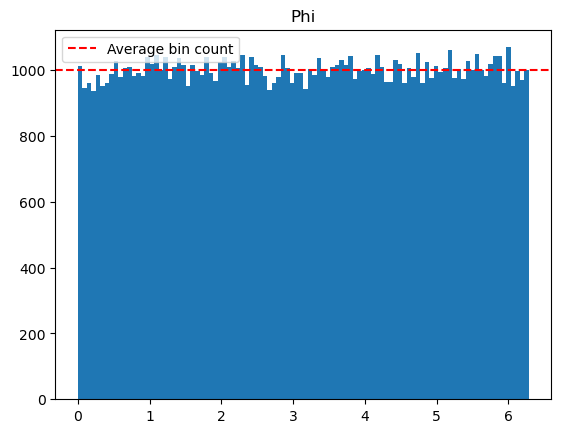

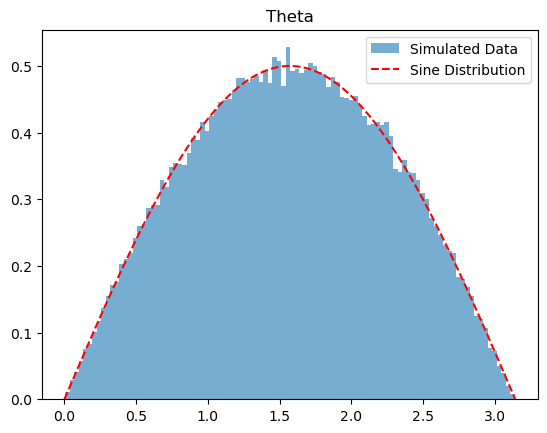

Average magnitude (should be close to 1): 1.0
Maximum deviation from 1: 2.220446049250313e-16


In [7]:
def Phi(NumParticles):
    """
    Generates random angles (phi) uniformly distributed between 0 and 2*pi.

    Parameters:
        NumParticles (int): The number of particles to simulate.

    Returns:
        np.ndarray: An array of azimuthal angles (phi) drawn from a uniform distribution.
    """
    Phi = np.random.uniform(0, 2 * np.pi, NumParticles)
    return Phi

def Theta(NumParticles):
    """
    Generates random polar angles (theta) with a distribution proportional to sin(theta).

    Parameters:
        NumParticles (int): The number of particles to simulate.

    Returns:
        np.ndarray: An array of polar angles (theta) drawn from a distribution proportional to sin(theta).
    """
    u = np.random.uniform(0, 1, NumParticles)
    Theta = np.arccos(1 - 2 * u)
    return Theta
    
def Udtr(NumParticles, Phi, Theta):
    """
    Calculates the 3D unit vector (Udtr) for each particle based on the spherical coordinates.

    Parameters:
        NumParticles (int): The number of particles to simulate.
        Phi (np.ndarray): The polar angles (phi) of the particles.
        Theta (np.ndarray): The polar angles (theta) of the particles.

    Returns:
        np.ndarray: An array of unit vectors representing the direction of the daughter particle.
    """
    Udtr = np.zeros((3, NumParticles))
    Udtr[0, :] = np.sin(Theta) * np.cos(Phi)
    Udtr[1, :]= np.sin(Theta) * np.sin(Phi)
    Udtr[2, :] = np.cos(Theta)
    return Udtr
    
# Call functions
Phi = Phi(NumParticles)
Theta = Theta(NumParticles)
Udtr = Udtr(NumParticles, Phi, Theta)

# plotting Phi
Counts, _, _ = plt.hist(Phi, 100)
plt.axhline(y=np.mean(Counts), color='red', linestyle='--', label = "Average bin count")
plt.title("Phi")
plt.legend()
plt.show()

# plotting Theta
counts, bins, _ = plt.hist(Theta, 100, density=True, alpha=0.6, label="Simulated Data")

# Overlay sinusoidal distribution
sine = np.linspace(0, np.pi, 100)
sin_dist = 0.5 * np.sin(sine)  # Proportional to sin(Theta)
plt.plot(sine, sin_dist, color='red', linestyle='--', label='Sine Distribution')
plt.title("Theta")
plt.legend()
plt.show()

# Check if all magnitudes are close to 1
magnitudes = np.sqrt(np.sum(Udtr**2, axis=0))

print("Average magnitude (should be close to 1):", np.mean(magnitudes))
print("Maximum deviation from 1:", np.max(np.abs(magnitudes - 1)))

## Part 3 - Propagation to Tracking Stations

The next step is to propagate the daughter particle to the tracking detectors. We can assume the particle takes a straight line path from the decay vertex. Since the tracking stations are at fixed values of $z$, the propagation is most easily performed by writing the path as two functions, giving the $x$ and $y$ coordinates as function of $z$ :

$$x(z) = m_x z + c_x$$
$$y(z) = m_y z + c_y$$

The gradients $m_x = \frac{dx}{dz}$ and $m_y = \frac{dy}{dz}$ can be computed directly from the components of the the daughter particle direction vector, $\textbf{u}_{dtr}$.

The intercepts $c_x$ and $c_y$, can then be found by solving the straight line equations given the $(x,y,z)$ coordinates of the decay vertex, $\textbf{r}_{vtx}$.

In [22]:
def Propogate(NumParticles, Udtr, DecayVertex, StationPositions):
    """
    Propagates the daughter particles from their decay vertex to the tracking stations.

    Parameters:
        NumParticles (int): The number of particles to simulate.
        Udtr (np.ndarray): The direction vectors of the daughter particles.
        DecayVertex (np.ndarray): The decay positions of the particles (1D array of z-positions).
        StationPositions (np.ndarray): The z-positions of the tracking stations.

    Returns:
        np.ndarray: An array of size (2, num_stations, num_particles) containing the x and y positions 
                    at each tracking station for all particles.
    """
    # Gradients m_x and m_y from the direction vector Udtr
    Mx = Udtr[0, :] / Udtr[2, :]  # Each particle's direction vector in x
    My = Udtr[1, :] / Udtr[2, :]  # Each particle's direction vector in y

    # Intercepts c_x and c_y using r_vtx
    Cx = DecayVertex - Mx * DecayVertex  # Adjust x-intercept based on decay position
    Cy = DecayVertex - My * DecayVertex  # Adjust y-intercept based on decay position

    # Propagate to tracking stations
    TrackingHits = np.zeros((2, len(StationPositions), NumParticles))  # Store x, y for all stations and particles

    # Loop over each station
    for i, z in enumerate(StationPositions):
        # Propagate each particle to the tracking stations
        TrackingHits[0, i, :] = Mx * z + Cx  # x(z) for each particle
        TrackingHits[1, i, :] = My * z + Cy  # y(z) for each particle

    # Mask out values greater than 5 for both x and y
    TrackingHits[TrackingHits > 5] = np.nan
    TrackingHits[TrackingHits < -5] = np.nan
    
    return TrackingHits

In the next cell, test your track propagation functions. (A qualitative assessment is acceptable here).

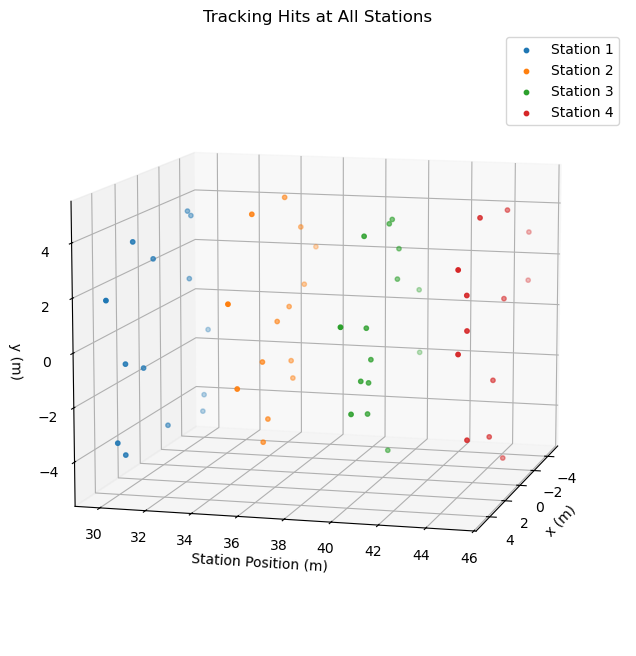

In [37]:
# Call function
TrackingHits = Propogate(NumParticles, Udtr, DecayVertex, StationPositions)

# Create a 3D plot to visualize the tracking hits
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter hits at all tracking stations
for station_idx in range(len(StationPositions)):
    ax.scatter(
        TrackingHits[0, station_idx, :],  # x-coordinates of particles at this station
        np.full(TrackingHits[0, station_idx, :].shape, StationPositions[station_idx]),  # y-coordinates (station position)
        TrackingHits[1, station_idx, :],  # z-coordinates of particles at this station
        s=10,  # Size of scatter points
        label=f"Station {station_idx + 1}"
    )

# Set plot title and labels
ax.set_title("Tracking Hits at All Stations")
ax.set_xlabel("x (m)")
ax.set_ylabel("Station Position (m)")
ax.set_zlabel("y (m)")

# Adjust the view angle
ax.view_init(elev=10, azim=15)

# Add legend
ax.legend()

# Show the plot
plt.show()


## Part 4 - Hit Smearing

The tracking detectors are not perfect, and will measure position with finite resolution.  This can be simulated by adding offsets (in x and y directions) to the true hit position, where the offsets are drawn from a normal distribution with a mean of zero and a standard deviation equal to the resolution of the detector.  This process is known as smearing.

You should write a function which takes the true hit positions and smears them according to the detector resolution, to produce the reconstructed (or measured) hit positions.

In [26]:
def Smear(TrackingHits, Resolution):
    """
    Simulates detector resolution by smearing the true hit positions.
    
    Parameters:
        true_hits (np.ndarray): Array of true hit positions with shape (2, n_stations, n_particles)
                                where the first dimension corresponds to (x, y).
        resolution (float): Standard deviation of the detector resolution (smearing).
    
    Returns:
        np.ndarray: Smeared hit positions with the same shape as true_hits.
    """
    Smearing = np.random.normal(0, Resolution, TrackingHits.shape)  # Gaussian smearing
    Smeared = TrackingHits + Smearing
    return Smeared

Again, you should test your code to verify that the desire distributions are indeed produced.

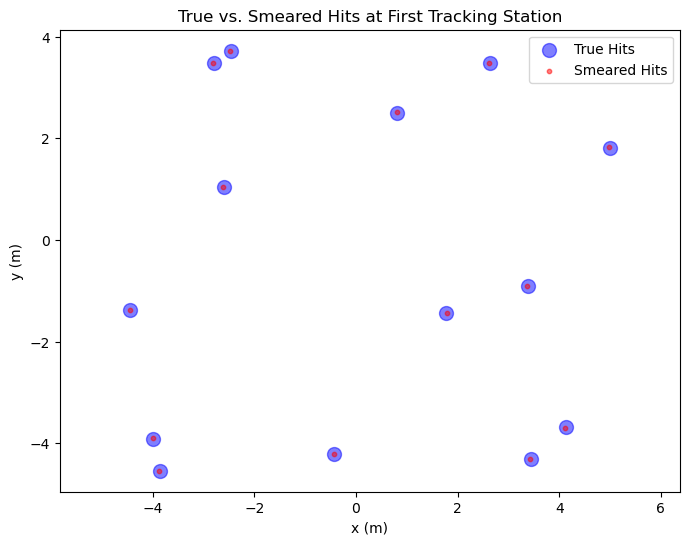

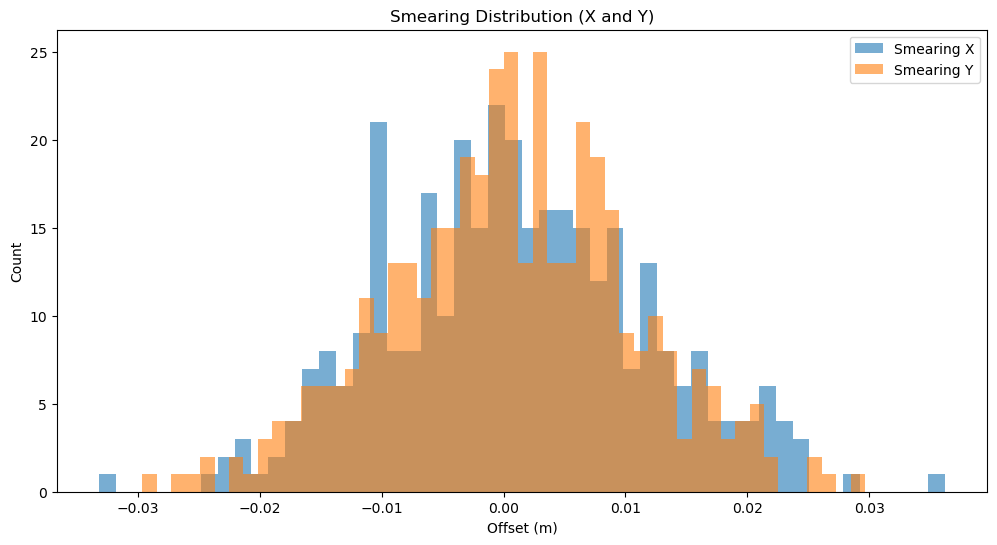

In [35]:
# Call function
SmearedHits = Smear(TrackingHits, Resolution)

# Validate the smearing distribution
smearing_x = SmearedHits[0, 0, :] - TrackingHits[0, 0, :]  # x-offsets
smearing_y = SmearedHits[1, 0, :] - TrackingHits[1, 0, :]  # y-offsets

# Plot smeared hits at the first station
plt.figure(figsize=(8, 6))
plt.scatter(TrackingHits[0, 0, :], TrackingHits[1, 0, :], s=100, alpha=0.5, label="True Hits", color = "blue")
plt.scatter(SmearedHits[0, 0, :], SmearedHits[1, 0, :], s=10, alpha=0.5, label="Smeared Hits", color = "red")
plt.title("True vs. Smeared Hits at First Tracking Station")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.axis("equal")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(smearing_x, bins=50, alpha=0.6, label="Smearing X")
plt.hist(smearing_y, bins=50, alpha=0.6, label="Smearing Y")
plt.title("Smearing Distribution (X and Y)")
plt.xlabel("Offset (m)")
plt.ylabel("Count")
plt.legend()
plt.show()

## Part 5 - Experiment Simulation

Now you are ready to simulate the full experiment.  You should produce a large sample of events.  For each event, generate a beam particle, a daughter particle, and finally the true and smeared hits.

From your sample of events, it is possible to compute many different quantities, the distributions of which will inform the design of the experiment. You should present at least :
* The 2D distribution in $(x,y)$ of true hits at each of the four stations
* The distribution of $N_s$, where $N_s$ for a single beam particle is the number of stations containing a hit

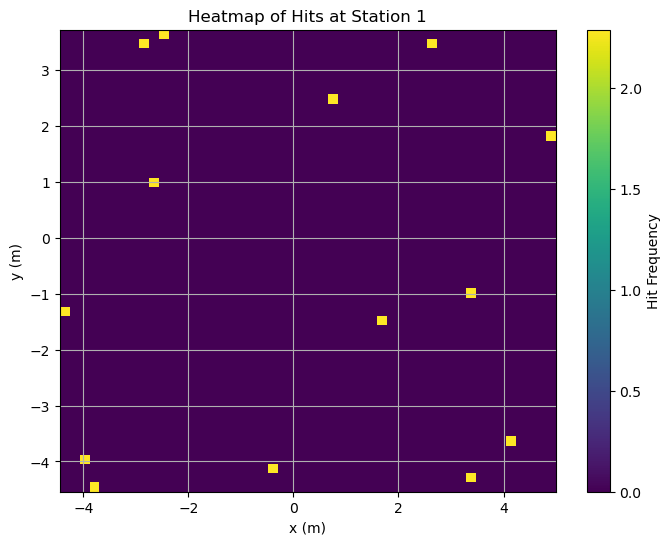

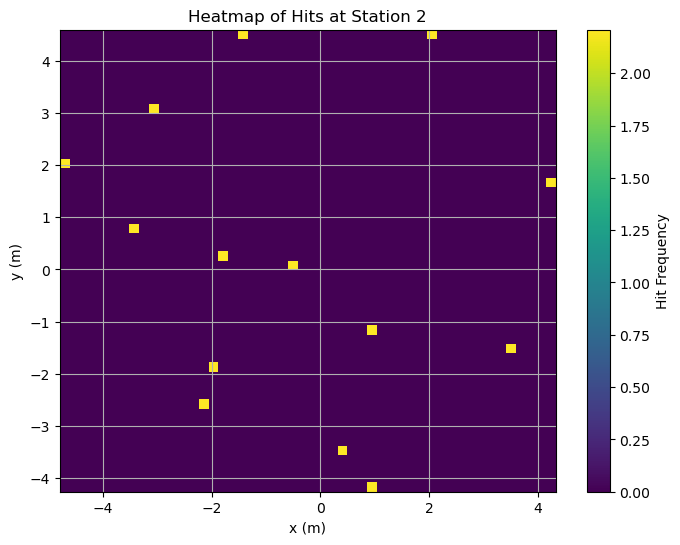

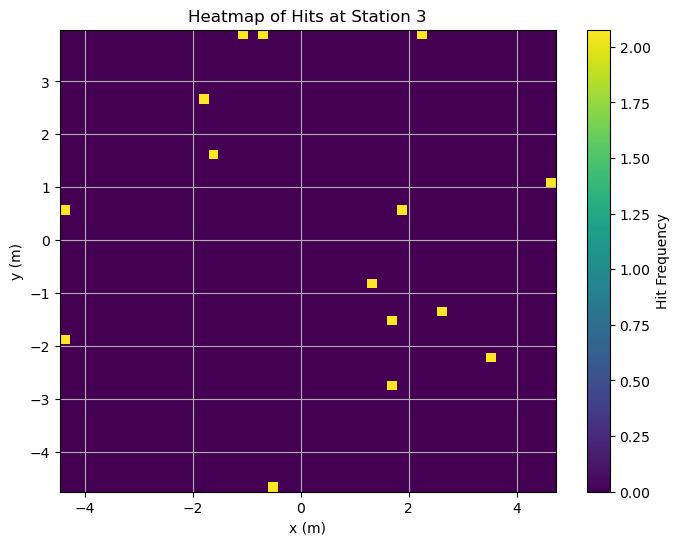

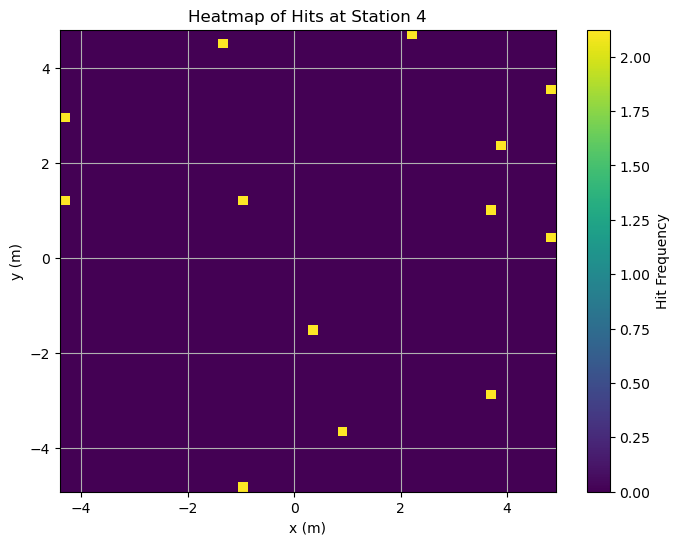

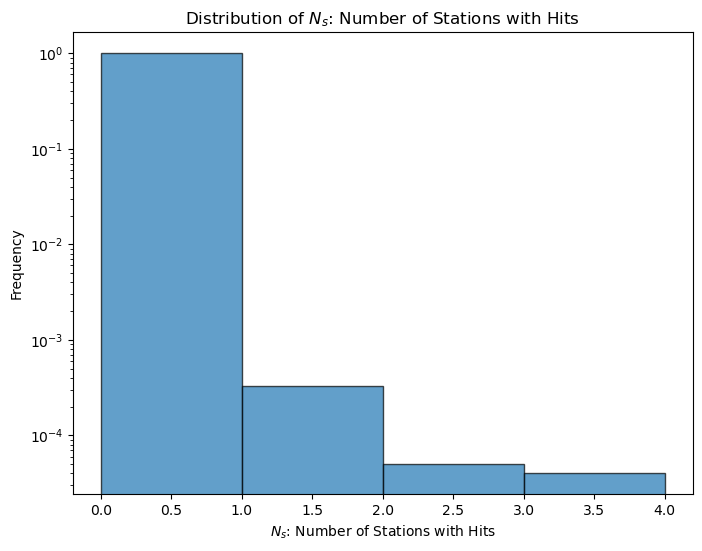

In [32]:
# 1. Plot 2D distribution of true hits at each station
# Function to create heatmap with colormap for each station
def create_heatmap(TrackingHits, station_idx, bins=50):
    """
    Creates a 2D heatmap of hit positions at a specified tracking station.

    Parameters:
        TrackingHits (np.ndarray): The tracking hit positions.
        station_idx (int): The index of the station for which to create the heatmap.
        bins (int): The number of bins for the histogram.

    Returns:
        None: Displays the heatmap.
    """
    # Extract the x and y hit positions for the given station index
    x_hits = TrackingHits[0, station_idx, :]
    y_hits = TrackingHits[1, station_idx, :]
    
    # Remove NaN values by filtering out the hits
    valid_hits = ~np.isnan(x_hits) & ~np.isnan(y_hits)
    x_hits = x_hits[valid_hits]
    y_hits = y_hits[valid_hits]
    
    # Create a 2D histogram to get the frequency of hits
    plt.figure(figsize=(8, 6))
    
    # Create the heatmap without the range (for all valid data points)
    plt.hist2d(x_hits, y_hits, bins=bins, cmap='viridis', density=True)
    
    # Add color bar to indicate hit frequency
    plt.colorbar(label='Hit Frequency')
    plt.title(f"Heatmap of Hits at Station {station_idx + 1}")
    plt.xlabel("x (m)")
    plt.ylabel("y (m)")
    plt.grid(True)
    plt.show()

# Create heatmaps for all four tracking stations
for station_idx in range(len(StationPositions)):
    create_heatmap(TrackingHits, station_idx, bins=50)





# 2. Compute and plot n_stations
def count_hits_per_station(TrackingHits, StationPositions, x_bound, y_bound):
    """
    Count the number of stations where each particle hits (i.e., has x, y within bounds).

    Parameters:
        TrackingHits (np.ndarray): The tracking hit positions, shape (2, num_stations, num_particles).
        StationPositions (np.ndarray): Positions of the tracking stations.
        x_bound (float): The maximum x position considered a valid hit.
        y_bound (float): The maximum y position considered a valid hit.
    
    Returns:
        np.ndarray: Array of size (NumParticles,) containing the number of hits (N_s) for each particle.
    """
    NumParticles = TrackingHits.shape[2]
    N_s = np.zeros(NumParticles, dtype=int)
    
    # Loop over all particles
    for i in range(NumParticles):
        hit_count = 0
        # Check for each station
        for j, z in enumerate(StationPositions):
            x = TrackingHits[0, j, i]  # x-coordinate of the hit at station j for particle i
            y = TrackingHits[1, j, i]  # y-coordinate of the hit at station j for particle i
            # Check if hit is within the x and y bounds for this station
            if abs(x) <= x_bound and abs(y) <= y_bound:
                hit_count += 1
        # Store the number of stations with hits for this particle
        N_s[i] = hit_count
    
    return N_s

# Parameters for hit region bounds (adjust as necessary for your detector)
x_bound = 10  # Maximum x-coordinate for a valid hit (in meters)
y_bound = 10  # Maximum y-coordinate for a valid hit (in meters)

# Compute the distribution of N_s
N_s = count_hits_per_station(TrackingHits, StationPositions, x_bound, y_bound)

# Plot the distribution of N_s
plt.figure(figsize=(8, 6))
plt.hist(N_s, bins=np.arange(0, len(StationPositions) + 1), alpha=0.7, edgecolor='black', density=True)
plt.title("Distribution of $N_s$: Number of Stations with Hits")
plt.xlabel("$N_s$: Number of Stations with Hits")
plt.ylabel("Frequency")
plt.yscale("log")
plt.show()

## Part 6 - Summary

In the Markdown cell below, describe how your code solves the problem set and what you have learnt from the exercise. There is no word limit, but you do not need to write large amounts. *Please do not re-state the problem*.  Make sure you include the following points :
* Explain your choice of Python libraries
* Discuss how you verified the distributions produced in Parts 1, 2 and 4
* Comment on the distributions generated in Part 5; whether these conform to expectations, and/or what you can learn from them

### Choice of Python Libraries
I used NumPy for efficient handling of arrays, mathematical operations, and random number generation. This library is essential for numerical simulations like the one in this problem, as it provides optimized array manipulation functions and random distribution capabilities (such as np.random.normal for smearing).

Matplotlib was used to create plots, including histograms, scatter plots, and heatmaps, to interpret the data and distributions. Its flexibility in plotting made it an ideal choice for displaying the results in a comprehensible way.

### Verification of Part 1, 2 and 4

Part 1: In this part the Beam Velocity, Deay Time and Decay Vertex were calculated for the particles. The Beam Velocity was a normal distribution of mean MuPZ and standard deviation SigmaPZ. This was confirmed by plotting the calculated data as a histogram compared to an ideal theoretical PDF. The decay time was an exponential decay distribution, this was again confirmed by plotting the calculated data as histogram and compared to an ideal exponential curve. The decay time was also calculated, this did not have an expected distribution however as the sum of a gaussian and exponential, it appears primarily as an exponential.

Part 2: In this part the polar coordinates of the unit vectors for the particles were calculated (Phi and Theta). Phi was a uniform distribution, this was evaluated by plotting the calculated data with a straight line at its mean, this tightly fit the calculated data. Theta was a sine distribution, this was again calculated, plotted and compared to a perfect sine distribution. 
Part 4: In this part the distribution of propgated particles was smeared by noise. To evaluate the effect of the noise on the true hits, they were plotted alongside one another. From this plot, it is hard to observe many differences between the two data sets due to the high resolution. However, there are slight differences between the true and smeared hits as expected plotted. To compare further the x and y distributions were plotted.

### Discuss Part 5
The heat maps at each station show that the majority of the sensor has no detections. It also shows that the majority of hits that do occur are not in the same place. This confirms the random distribution of the particles throughout the sensor as expected. The distribution of Ns appears to be exponential as the number of stations with hits decreases, this is again as expected as due to the inverse square law, the likelihood of the particle reaching the further stations with the same area should be decreasing to the 2nd order.


# Extensions

A variety of extensions are possible to this exercise, drawing on some of the topics already covered in the unit. A few ideas are given below.  Please discuss your plans for an extension with the unit director before starting work. 
   * Additional realism in the experiment, for example random variation in the longitudinal and transverse beam momentum
   * Reconstructing the vertex location from the hit positions using linear algebra methods
   * Extracting the lifetime of the X particle from reconstructed vertex positions
   * Optimal placement of tracking stations